In [2]:
import librosa
import os

In [42]:
sounds = []
for i in os.listdir("Full Wav_dan_Lab_Full/NATURAL/MMHT"):
    if ".wav" in i:
        sounds.append(i)

In [48]:
sounds[0:1]

['mmht_0966.wav']

In [82]:
sounds_np = []
for i in sounds[0:]:
    y, sr = librosa.load("Full Wav_dan_Lab_Full/NATURAL/MMHT/"+i)
    y_lama = []
    for i in y:
        if i == 0.0:
            pass
        else:
            y_lama.append(i)
    sounds_np.append(y_lama)
sounds_list = []
for j in sounds_np:
    sounds_list = sounds_list + j
sounds_np = sounds_list

In [63]:
def concat_sound(sounds_np):
    x = np.linspace(0,len(sounds_np),len(sounds_np))
    plt.plot(x,sounds_np)

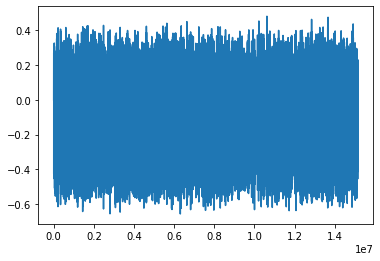

In [83]:
concat_sound(sounds_np)

In [86]:
np_sounds = np.array(sounds_np)

In [91]:
data_train = np_sounds.reshape((len(np_sounds),1))

In [106]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(data_train)

In [107]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [108]:
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [112]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 500, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 500, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 500, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 500))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [118]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 1500)

Epoch 1/10
15156999/15156999 [==============================] - 14281s 942us/step - loss: 4.8235e-04
Epoch 2/10
15156999/15156999 [==============================] - 14282s 942us/step - loss: 7.6930e-04
Epoch 3/10
15156999/15156999 [==============================] - 14308s 944us/step - loss: 0.0031
Epoch 4/10
15156999/15156999 [==============================] - 14334s 946us/step - loss: 5.8626e-05
Epoch 5/10
15156999/15156999 [==============================] - 14287s 943us/step - loss: 4.3367e-05
Epoch 6/10
15156999/15156999 [==============================] - 14407s 950us/step - loss: 3.8322e-05
Epoch 7/10
15156999/15156999 [==============================] - 14474s 955us/step - loss: 3.5494e-05
Epoch 8/10
15156999/15156999 [==============================] - 14476s 955us/step - loss: 3.3742e-05
Epoch 9/10
15156999/15156999 [==============================] - 14477s 955us/step - loss: 3.2507e-05
Epoch 10/10
15156999/15156999 [==============================] - 14493s 956us/step - loss: 3.14

In [119]:
regressor.save("rnn.h5")

In [120]:
regressor.save("speechmodel.h5")